<a href="https://colab.research.google.com/github/cormac-black/chekhovs-biscuit/blob/main/back_at_it.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mping
import numpy as np
import cv2


what is this? Is this just text?

Original, dtype=uint8,shape=(500, 333, 3)



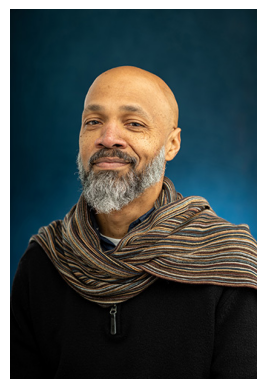


 Edges dtype=uint8,shape=(500, 333)



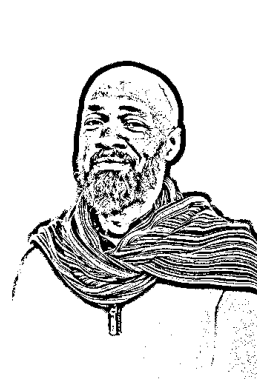


 posterized dtype=uint8,shape=(500, 333, 3)



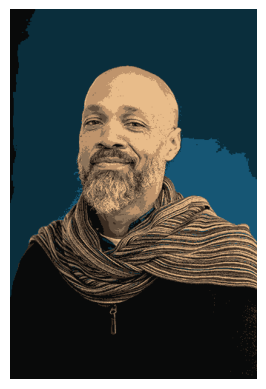


 addWeighted, dtype=uint8,shape=(500, 333, 3)



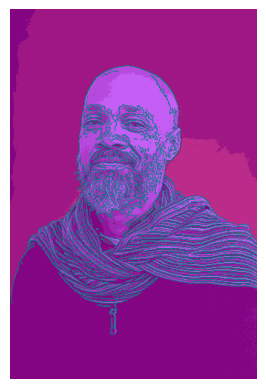

In [17]:

image = mping.imread('/content/headshot.jpg')
plt.imshow(image)
plt.axis('off')
print(f'Original, dtype={image.dtype},shape={image.shape}\n')
plt.show()


img_path = '/content/headshot.jpg' # cv2 starts with image path


## posterize it
img_raw = cv2.imread(img_path)

img_RGB = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)

img_GRAY = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2GRAY)
edges = cv2.adaptiveThreshold(img_GRAY, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 17,8) # THIS IS NOT USED
pixel_values = img_RGB.reshape((-1, 3))
pixel_values = np.float32(pixel_values)


a_channel = 255 - edges

rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
rgba = np.dstack([rgb, a_channel])


cv2.imwrite('img_tp.png', rgba)

img_tp = mping.imread('img_tp.png')

plt.imshow(edges, cmap='gray')
plt.axis('off')
print(f'\n Edges dtype={edges.dtype},shape={edges.shape}\n')
plt.show()






def posterize_it(img):
  k = 8
  _, labels, centers = cv2.kmeans(pixel_values, k, None, (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, .2), 10, cv2.KMEANS_RANDOM_CENTERS)
  centers = np.uint8(centers)

  quantized_img = centers[labels.flatten()]
  quantized_img = quantized_img.reshape(img_RGB.shape)
  plt.imshow(quantized_img)
  plt.axis('off')
  print(f'\n posterized dtype={quantized_img.dtype},shape={quantized_img.shape}\n')
  plt.show()
  return quantized_img

quantized_img = posterize_it(img_RGB)

def find_edges(img):
  img_GRAY = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2GRAY)
  edges1 = cv2.Canny(img_GRAY, 50, 165)
  kernel = np.ones((1,1), np.uint8) # gaussian kernel = border thickess
  dilated_edges = cv2.dilate(edges1, kernel, iterations=1) # edges or edges1 ???

  result = quantized_img.copy()
  result[dilated_edges !=0] = [0,0,0]

  img_GRAY_blur = cv2.medianBlur(img_GRAY, 3) # Changed ksize from 1 to 3 based on original comment's implied intent

  img_filtered = cv2.applyColorMap(dilated_edges, cv2.COLORMAP_SPRING) # MAGMA

  alpha = 0.5
  beta = 0.5
  gamma = 0 # brightness; gamma max -/+100, else whiteout, blackout

  blended_img = cv2.addWeighted(cv2.cvtColor(result, cv2.COLOR_BGR2RGB), alpha, img_filtered, beta, gamma)

  plt.imshow(blended_img)
  plt.axis('off')
  print(f'\n addWeighted, dtype={blended_img.dtype},shape={blended_img.shape}\n')
  plt.show()
  return blended_img

blended_img = find_edges(quantized_img)

def covert2RBG(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

